In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the DATA: https://www.kaggle.com/des137/us-births-2018
# female = 1, male = 0

filename = "us_births_test.csv"
df = pd.read_csv("../data/" + filename)
df.shape

c:\users\alexa\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(760307, 55)

In [6]:
# change text to numeric
df['SEX'] = df['SEX'].map({'F': 1, 'M': 0}) # change gender classifiers to numeric
df['RF_CESAR'] = df['RF_CESAR'].map({'N': 0, 'Y': 1, '': 0}) # change previous C-section Y/N to numeric
df['MTRAN'] = df['MTRAN'].map({'N': 0, 'Y': 1}) # change mother transferred Y/N to numeric
df['MM_AICU'] = df['MM_AICU'].map({'N': 0, 'Y': 1}) # change admitted to ICU Y/N to numeric
df['LD_INDL'] = df['LD_INDL'].map({'N': 0, 'Y': 1}) # change induction of labour Y/N to numeric
df['IP_GON'] = df['IP_GON'].map({'N': 0, 'Y': 1}) # change gonorrhea Y/N to numeric

# drop columns with empty entries
df = df.drop("MRACEIMP", axis=1) # drop flag variable (empty entries)
df = df.drop("MAR_IMP", axis=1) # drop marital status (empty entries)
df = df.drop("MAGE_IMPFLG", axis=1) # drop age (empty entries)
df = df.drop("IMP_SEX", axis=1) # drop imputed sex (empty entries)
df = df.drop("DOB_YY", axis=1) # drop year of birth (empty entries)

df.shape

(760307, 50)

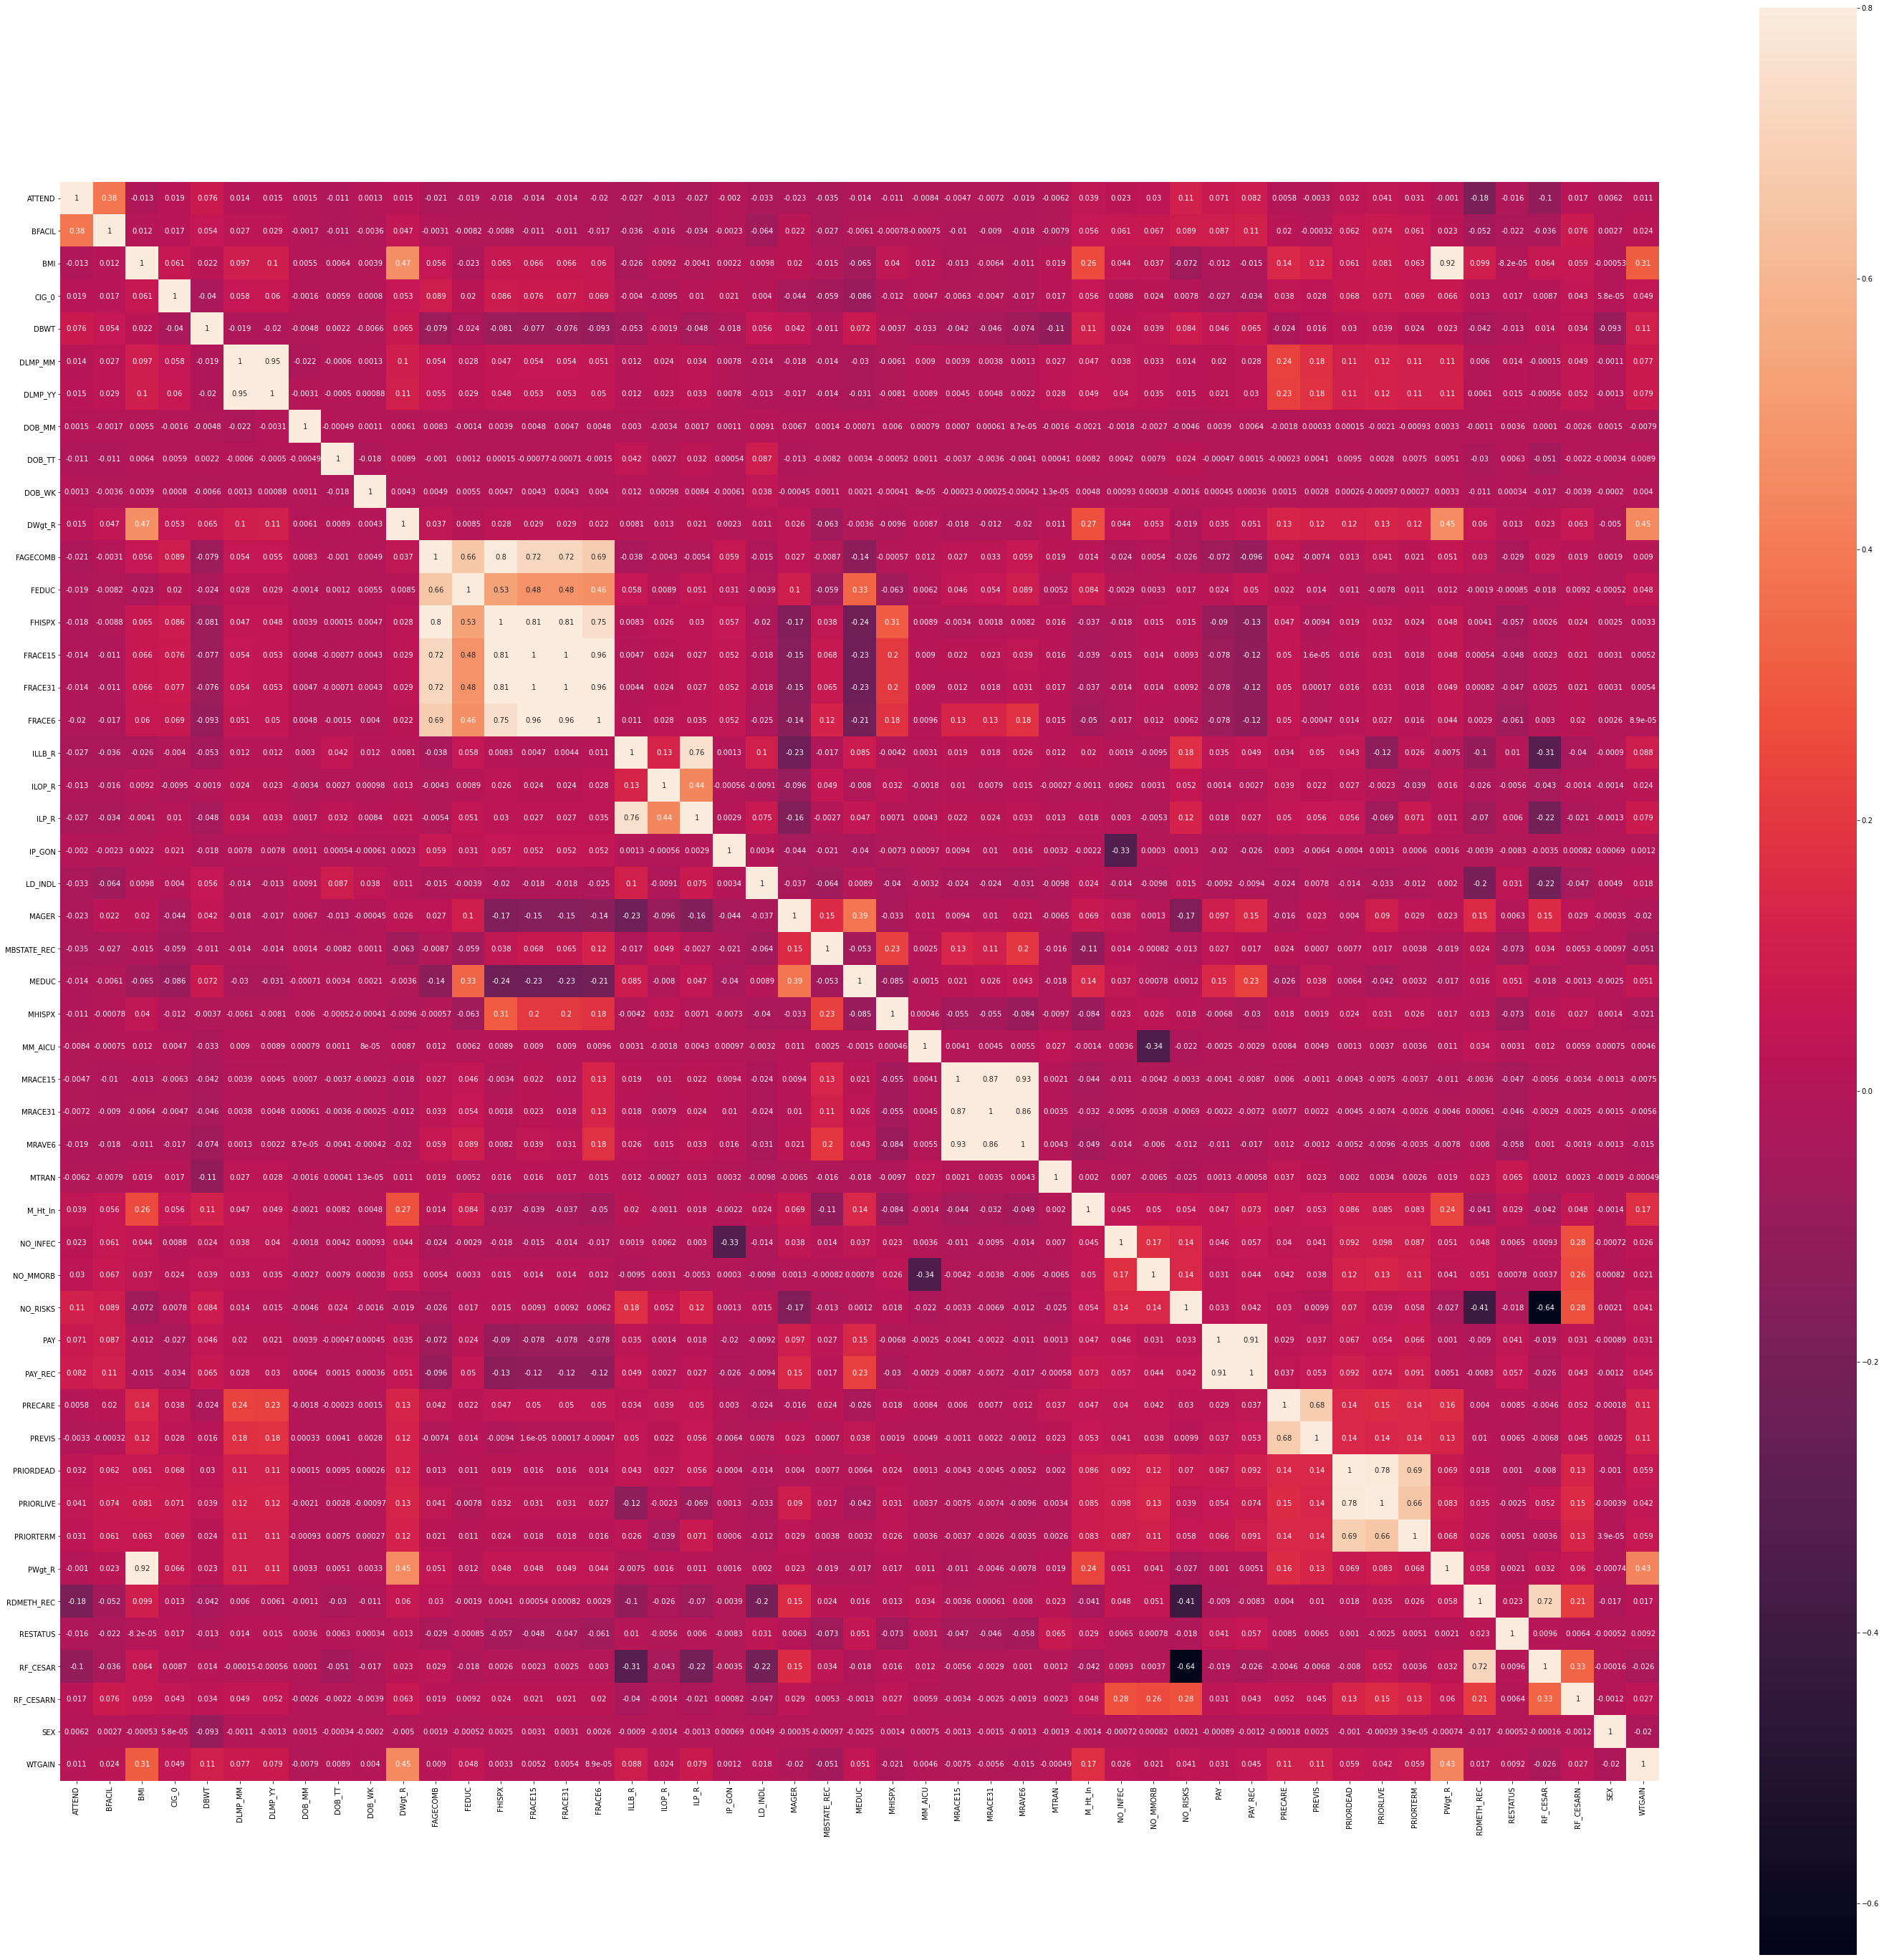

In [3]:
# correlation heat map
import seaborn as sb

C_mat = df.corr()
fig = plt.figure(figsize = (50,50))

sb.heatmap(C_mat, vmax=.8, square=True, annot=True)
plt.savefig("../plots/birth-wt-heatmap.png")
plt.show()

In [7]:
# alternatively, try keeping only the 10-15 most relevent columns
# df = df.filter(['BMI', 'CIG_0', 'DBWT', 'DWgt_R', 'FAGECOMB', 'MAGER', 'M_Ht_In', 'PRECARE', 'PREVIS', 'PWgt_R', 'WTGAIN', 'RF_CESARN', 'RF_CESAR', 'RDMETH_REC', 'PRIORLIVE', 'PRIORDEAD', 'NO_RISKS', 'PAY_REC'])

# keep most correlated columns
attributes = ['DBWT', 'WTGAIN', 'PWgt_R', 'PRIORTERM', 'PRIORLIVE', 'PRIORDEAD', 'PREVIS', 'PAY_REC', 'PAY', 'NO_RISKS', 'M_Ht_In', 'MEDUC', 'MAGER', 'DWgt_R', 'BMI', 'ATTEND']
df = df.filter(attributes)
df.head()

# find bad values
for attribute in attributes:
    if df[attribute].isnull().values.any():
        print(attribute)

df.to_csv('../data/' + filename, index=False)  
print("Saved updated file.")

Saved updated file.
